## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [391]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [392]:
df.shape

(10841, 13)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [394]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [395]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [396]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has msising values

In [397]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning

For 'Reviews'

In [398]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [399]:
df['Reviews'].isnull().sum()  ## No null values

0

In [400]:
df['Reviews'].str.isnumeric().sum()

10840

In [401]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [402]:
df_copy = df.copy()

In [403]:
df_copy.drop(df_copy.index[10472], inplace=True)

In [404]:
df_copy[~df_copy['Reviews'].str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [405]:
## Convert Reviews Datatype to int

df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [406]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


For 'Size'

In [407]:
print(df_copy['Size'].isnull().sum())

0


In [408]:
df_copy['Size'].unique() 

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [409]:
## 19M = 19000000 = 19000k

In [410]:
def convert_size(value):
    if value == 'Varies with device':
        return np.nan
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000
    elif 'k' in value:
        return value.replace('k', '')
    else:
        return np.nan

In [411]:
df_copy['Size'] = df_copy['Size'].apply(convert_size)

In [412]:
df_copy['Size'].unique()

array([19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0,
       33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0,
       2700.0, 5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 7000.0, 23000.0,
       6000.0, 6100.0, 4600.0, 9200.0, 5200.0, 11000.0, 24000.0, nan,
       9400.0, 15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0,
       57000.0, 35000.0, 54000.0, '201', 3600.0, 5700.0, 8600.0, 2400.0,
       27000.0, 2500.0, 16000.0, 3400.0, 8900.0, 3900.0, 2900.0, 38000.0,
       32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0, 9800.0, 52000.0,
       9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 3700.0, 22000.0, 7400.0,
       6400.0, 3200.0, 8200.0, 9900.0, 4900.0, 9500.0, 5000.0, 5900.0,
       13000.0, 73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 7200.0, 2100.0,
       42000.0, 7300.0, 9100.0, 55000.0, '23', 6500.0, 1500.0, 7500.0,
       51000.0, 41000.0, 48000.0, 8500.0, 46000.0, 8300.0, 4300.0, 4700.0,
       3300.0, 40000.0, 7800.0, 8800.0, 6600.0, 5100.0, 6100

In [413]:
df_copy['Size'] = df_copy['Size'].astype(float)

In [414]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


For 'Ratings'

In [415]:
df_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [416]:
df_copy['Rating'].isnull().sum()

1474

In [417]:
df_copy['Rating'] = df_copy['Rating'].fillna(df_copy['Rating'].mean())

In [418]:
df_copy['Rating'].isnull().sum()

0

For 'Installs' and 'Price'

In [419]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [420]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [421]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [422]:
cahrs_replace = ['+', '$', ',']
cols_to_clean = ['Price', 'Installs']
for chars in cahrs_replace:
    for cols in cols_to_clean:
        df_copy[cols] = df_copy[cols].str.replace(chars, '')

In [423]:
df_copy['Price'] = df_copy['Price'].astype(float)
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [424]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


For 'Last Updated'

In [425]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [426]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [427]:
'''
from datetime import datetime

# Current datetime
now = datetime.now()               # 2025-06-25 14:30:00
today = datetime.today()           # Same as now()

# From string
dt = datetime.strptime("2025-06-25", "%Y-%m-%d")

# To string
dt.strftime("%B %d, %Y")           # 'June 25, 2025'

# Create manually
custom_dt = datetime(2025, 6, 25, 15, 45)
'''

'''
dt.year        # 2025
dt.month       # 6
dt.day         # 25
dt.hour        # 15
dt.minute      # 45
dt.second      # 0
'''

'\ndt.year        # 2025\ndt.month       # 6\ndt.day         # 25\ndt.hour        # 15\ndt.minute      # 45\ndt.second      # 0\n'

In [428]:
df_copy['Day_Last_Updated'] = df_copy['Last Updated'].dt.day

In [429]:
df_copy['Month_Last_Updated'] = df_copy['Last Updated'].dt.month
df_copy['Year_Last_Updated'] = df_copy['Last Updated'].dt.year

In [430]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 10840 non-null  object        
 1   Category            10840 non-null  object        
 2   Rating              10840 non-null  float64       
 3   Reviews             10840 non-null  int32         
 4   Size                9145 non-null   float64       
 5   Installs            10840 non-null  int32         
 6   Type                10839 non-null  object        
 7   Price               10840 non-null  float64       
 8   Content Rating      10840 non-null  object        
 9   Genres              10840 non-null  object        
 10  Last Updated        10840 non-null  datetime64[ns]
 11  Current Ver         10832 non-null  object        
 12  Android Ver         10838 non-null  object        
 13  Day_Last_Updated    10840 non-null  int32         


In [431]:
df_copy.drop('Last Updated', axis=1, inplace=True)

In [432]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day_Last_Updated,Month_Last_Updated,Year_Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [433]:
df_copy.to_csv('google_cleaned.csv')

# EDA

In [434]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day_Last_Updated,Month_Last_Updated,Year_Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


For 'App'

In [435]:
df_copy['App'].duplicated().sum()

1181

In [436]:
df_copy[df_copy['App'].duplicated()].shape

(1181, 15)

## Observation

The Dataset has duplicate records

In [437]:
df_copy=df_copy.drop_duplicates(subset=['App'], keep='first')

In [438]:
df_copy.shape

(9659, 15)

# Explore Data


In [439]:
numeric_feature = [features for features in df_copy.columns if df_copy[features].dtype != 'O']

In [440]:
categorical_feature = [features for features in df_copy.columns if df_copy[features].dtype == 'O'] 

In [441]:
print("We have {} numerical features : {}".format(len(numeric_feature), numeric_feature))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day_Last_Updated', 'Month_Last_Updated', 'Year_Last_Updated']


In [442]:
print("We have {} categorical features : {}".format(len(categorical_feature), categorical_feature))


We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [443]:
## Proportion of count data on categoriucal columns
for col in categorical_feature:
    print(df_copy[col].value_counts(normalize=True)*100)  ## normalize=True means that the count value will be in the fomr of percentage
    print("-------------------------------------------------")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
-------------------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE 

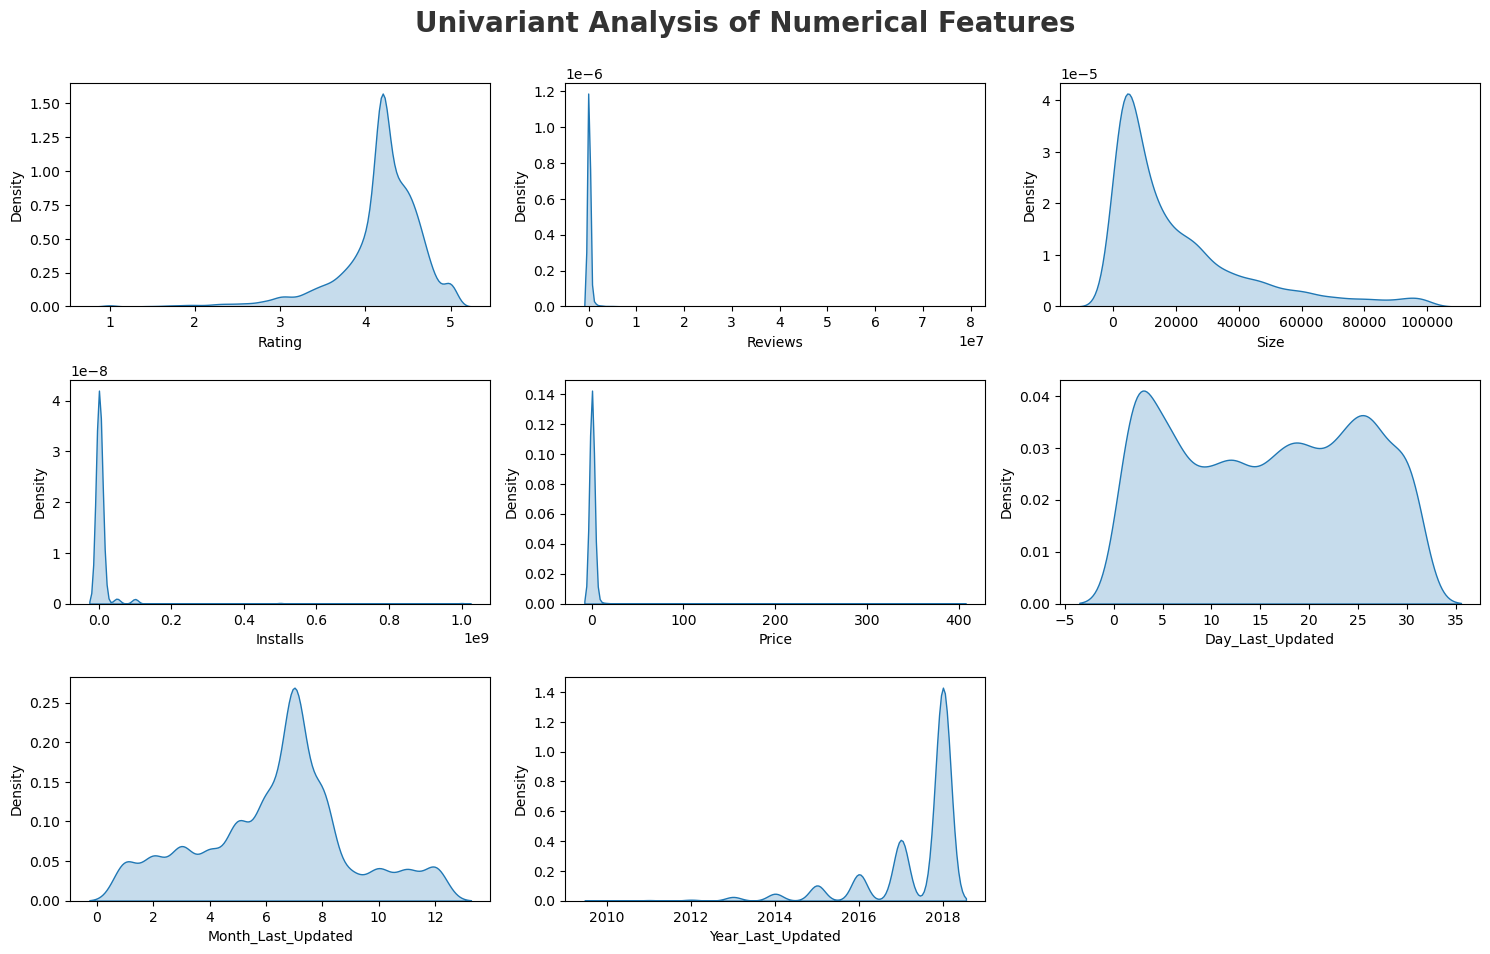

In [444]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariant Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numeric_feature)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]], fill=True)
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

##### Observation for numerical features:

Rating and Year_Last_Update is left skewed while Reviews, Price, Installs and Size are Right Skewed 

C:\Users\Sandesh Chipkar\AppData\Local\Temp\ipykernel_10964\3105899009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]], palette='Set2')
C:\Users\Sandesh Chipkar\AppData\Local\Temp\ipykernel_10964\3105899009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]], palette='Set2')


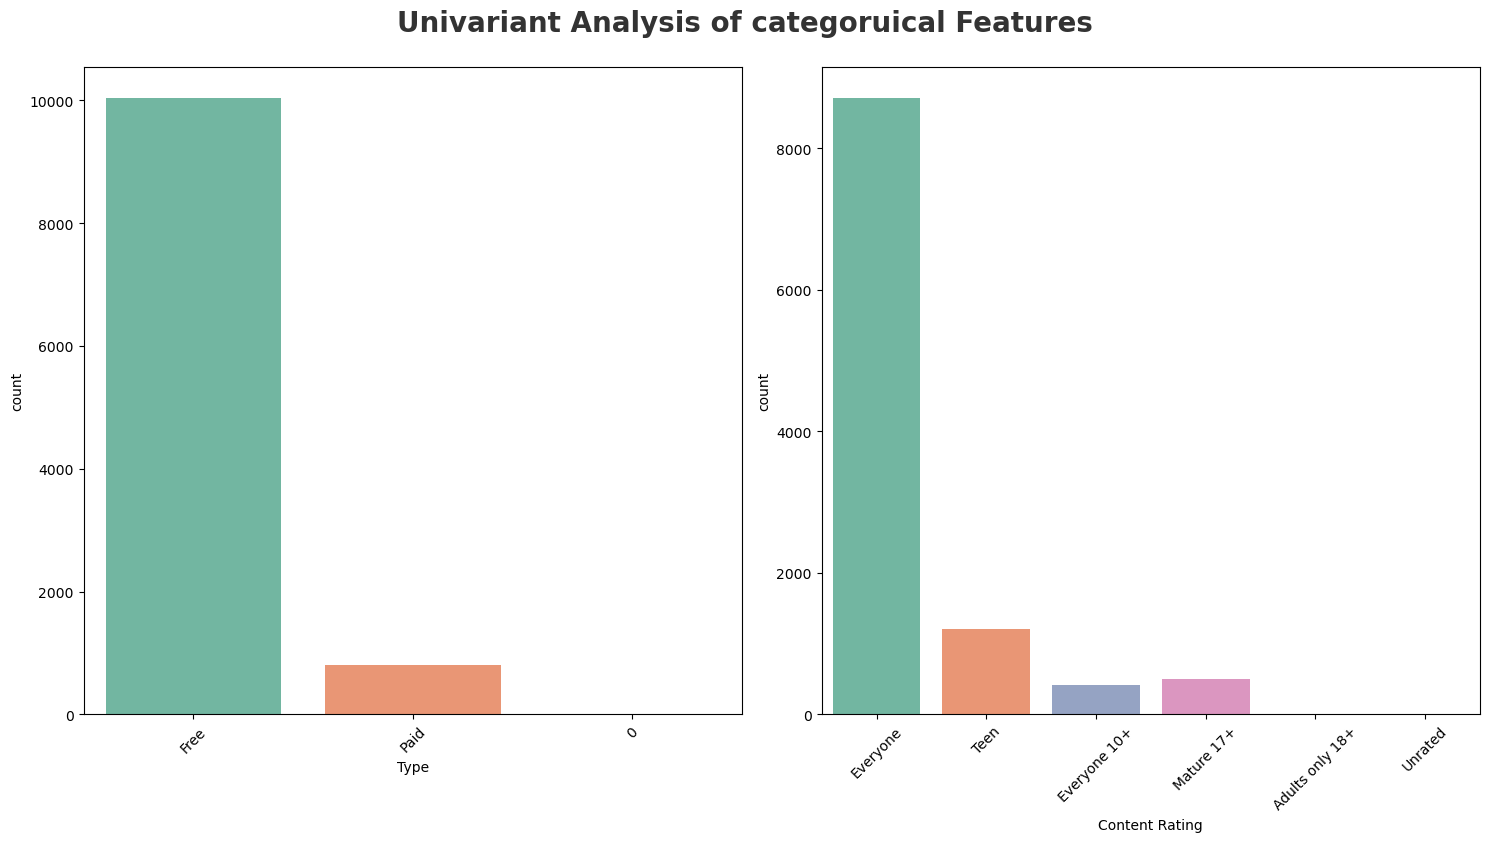

In [445]:
## Proportion of count data on categorical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariant Analysis of categoruical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Whcih is the most popular app category?

In [446]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day_Last_Updated,Month_Last_Updated,Year_Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

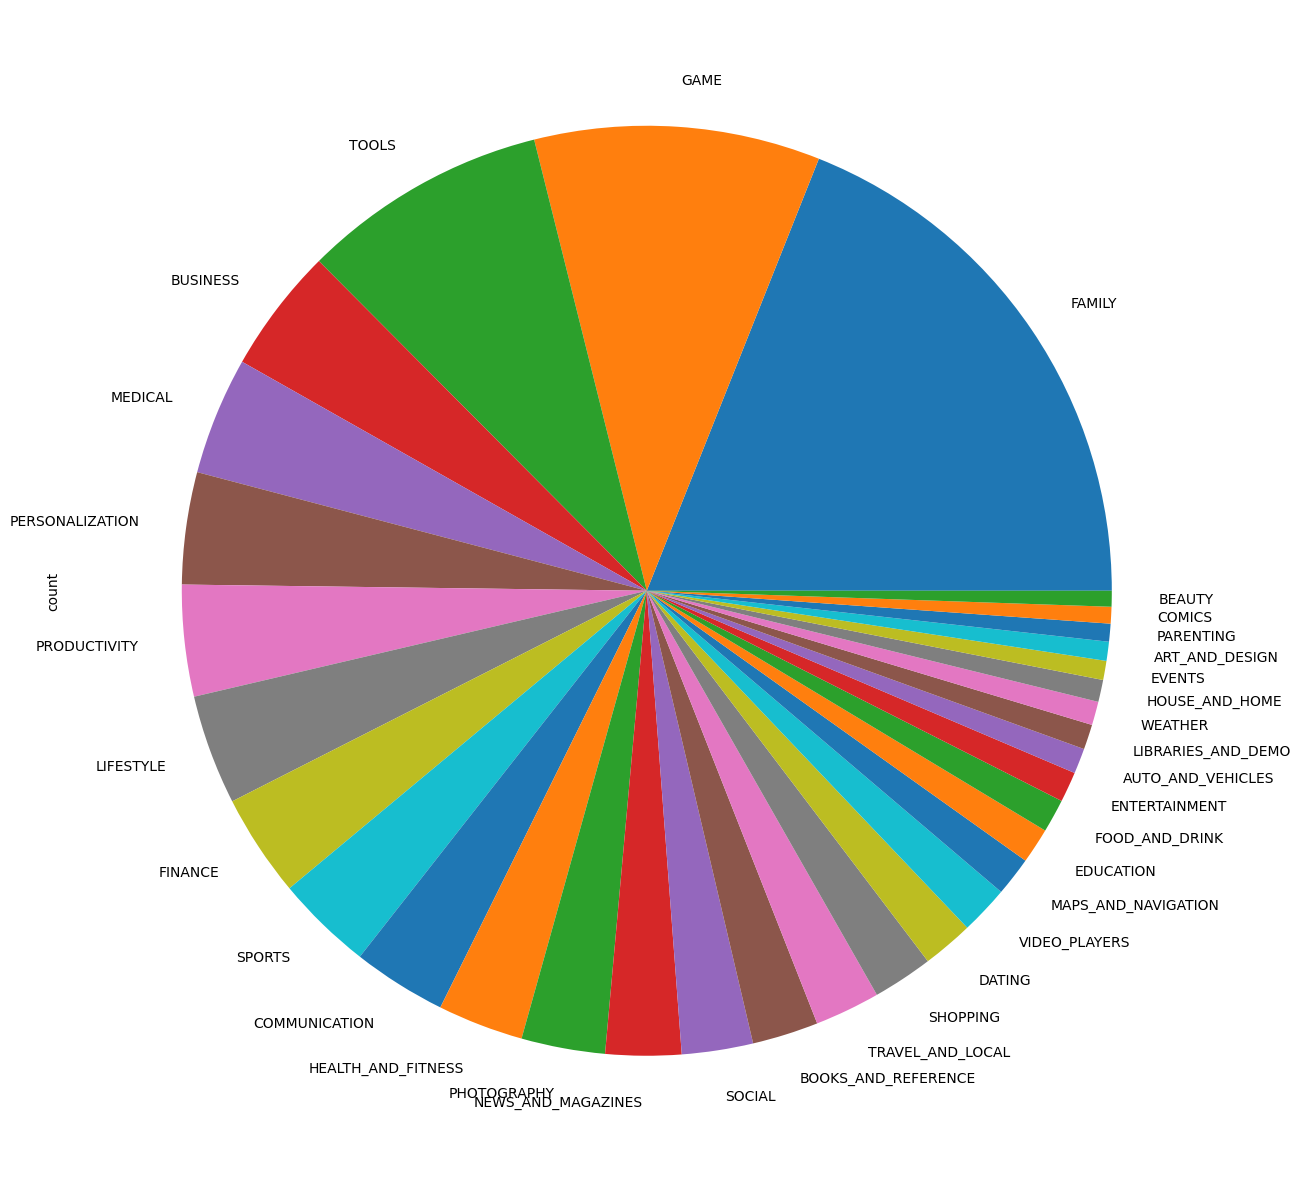

In [447]:
df_copy['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15,16))

## Observations

1. There are more kind od app in playstore which are under catergory of family, games and tools
2. Beauty, comic, arts and weather kind of app are very less in playstore

In [448]:
## Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts())

In [449]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [450]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, FAMILY to 1.9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   34 non-null     int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [451]:
category.rename(columns = {'Category': 'Count'}, inplace=True)

In [452]:
category


,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [453]:
category.index[:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE'],
      dtype='object', name='Category')

C:\Users\Sandesh Chipkar\AppData\Local\Temp\ipykernel_10964\2576010436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category.index[:10], y='count', data= category[:10], palette='hls')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'MEDICAL'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'PRODUCTIVITY'),
  Text(6, 0, 'PERSONALIZATION'),
  Text(7, 0, 'COMMUNICATION'),
  Text(8, 0, 'SPORTS'),
  Text(9, 0, 'LIFESTYLE')])

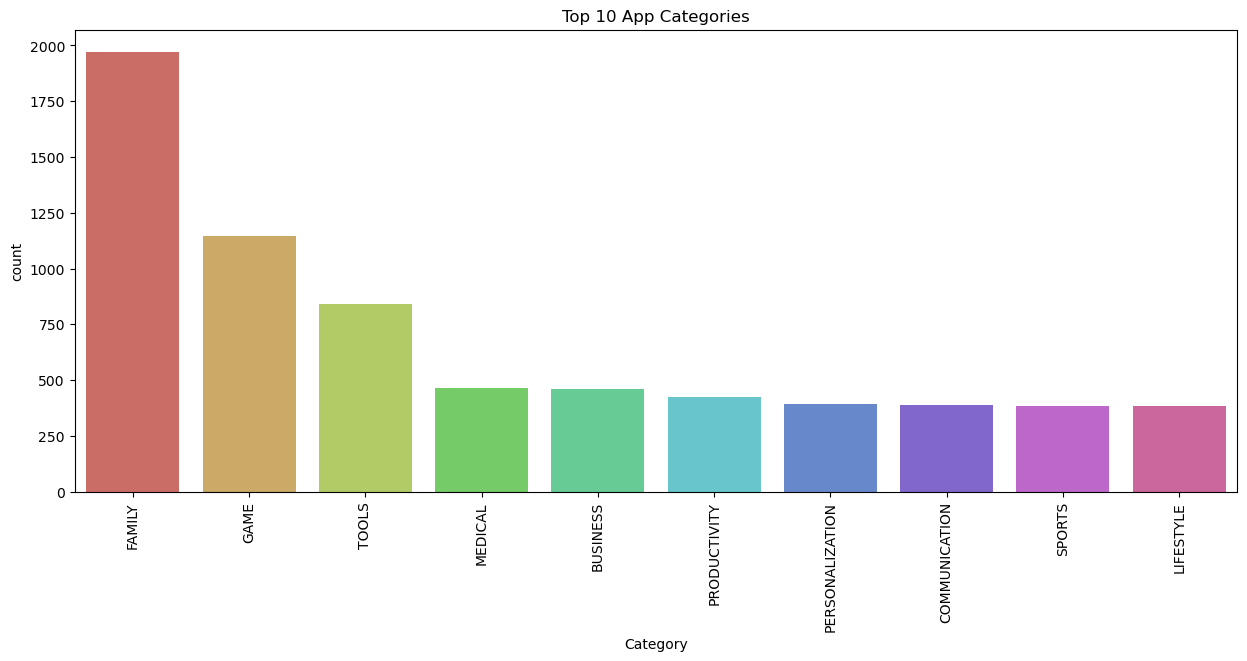

In [454]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count', data= category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)


## Insights

1. Family category has the most number of apps with 18% of apps belong to it, followed by Games category which has 11% of apps.
2. Least number of apps belong to the beauty category with less than 1% of the total apps belonging to it.

In [455]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day_Last_Updated,Month_Last_Updated,Year_Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [456]:
## Category which has largest number of installations

df_installs = df_copy.groupby('Category')['Installs'].sum()

In [457]:
print(df_installs)

Category
ART_AND_DESIGN           114338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1665969576
BUSINESS                 697164865
COMICS                    44981150
COMMUNICATION          11038276251
DATING                   140926107
EDUCATION                352952000
ENTERTAINMENT           2113660000
EVENTS                    15973161
FAMILY                  4427941505
FINANCE                  455348734
FOOD_AND_DRINK           211798751
GAME                   13878924415
HEALTH_AND_FITNESS      1144022512
HOUSE_AND_HOME            97212461
LIBRARIES_AND_DEMO        52995910
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
MEDICAL                   38193177
NEWS_AND_MAGAZINES      2369217760
PARENTING                 31521110
PERSONALIZATION         1532494782
PHOTOGRAPHY             4649147655
PRODUCTIVITY            5793091369
SHOPPING                1400348785
SOCIAL                  5487867902
SPORTS     

In [458]:
df_installs.info()

<class 'pandas.core.series.Series'>
Index: 33 entries, ART_AND_DESIGN to WEATHER
Series name: Installs
Non-Null Count  Dtype
--------------  -----
33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FAMILY'),
  Text(12, 0, 'FINANCE'),
  Text(13, 0, 'FOOD_AND_DRINK'),
  Text(14, 0, 'GAME'),
  Text(15, 0, 'HEALTH_AND_FITNESS'),
  Text(16, 0, 'HOUSE_AND_HOME'),
  Text(17, 0, 'LIBRARIES_AND_DEMO'),
  Text(18, 0, 'LIFESTYLE'),
  Text(19, 0, 'MAPS_AND_NAVIGATION'),
  Text(20, 0, 'MEDICAL'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'PARENTING'),
  Text(23, 0, 'PERSONALIZATION'),
  Text(24, 0, 'PHOTOGRAPHY'),
  Text(25, 0, 'PRODUCTIVITY'),
  Text(26, 0, 'SHOPPING'),
  

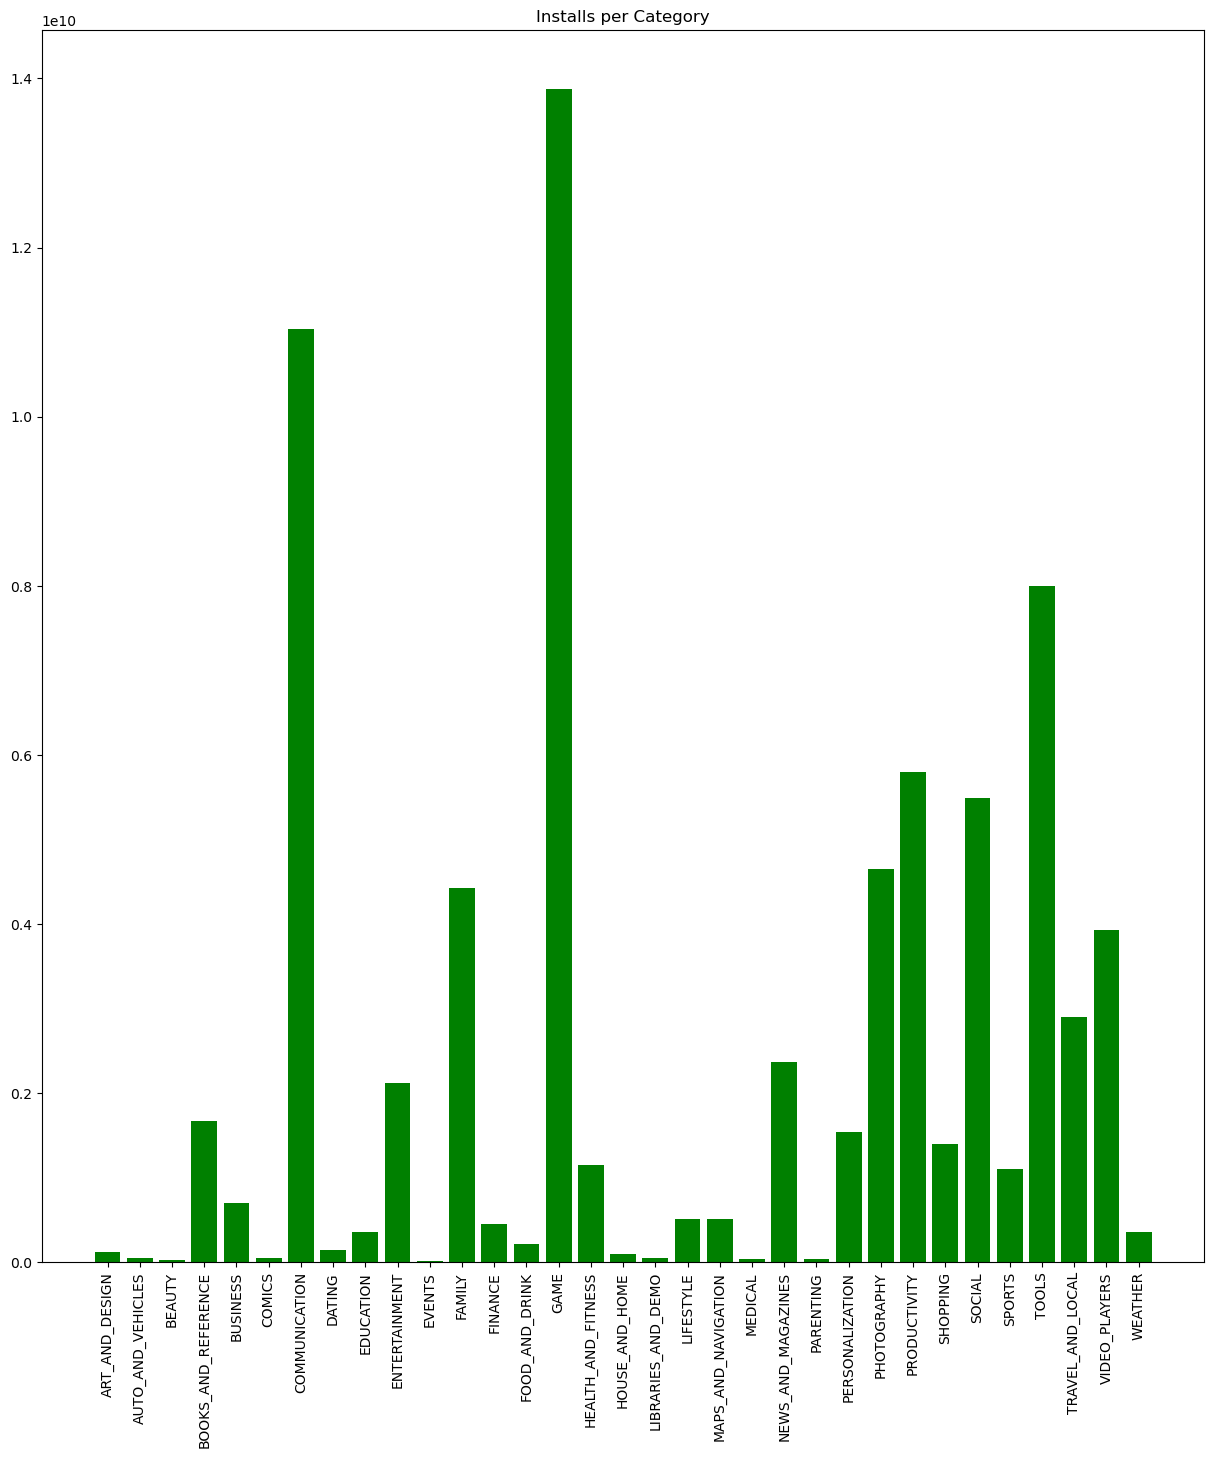

In [459]:
plt.figure(figsize=(15,16))
plt.bar(df_installs.index, df_installs.values, color='green')
plt.title('Installs per Category')
plt.xticks(rotation=90)


In [460]:
df_install = pd.DataFrame(df_installs) 

In [461]:
df_install.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, ART_AND_DESIGN to WEATHER
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Installs  33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


In [462]:
app_category = []
percentage_count = []

for key, value in df_installs.items():
    percentage = (value/int(df_installs.sum()))*100
    app_category.append(key)
    percentage_count.append(percentage)
    
print(app_category)
print(percentage_count)
df_category_per = pd.DataFrame({
    'category': app_category,
    'Installs': percentage_count
})
print(df_category_per)

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']
[0.1522013166203806, 0.07072435230704927, 0.036203389930306015, 2.2176576566927144, 0.9280319539547176, 0.05987671872366983, 14.693616376533097, 0.1875939781366372, 0.46983253267105696, 2.8136013707402316, 0.021262694891635556, 5.89426032948798, 0.6061380837728061, 0.28193619415358623, 18.47494902607045, 1.5228671157711662, 0.1294044990786746, 0.07054557734906558, 0.6706653860798778, 0.669944369280175, 0.050840899274303485, 3.1537874289706487, 0.04195936825376533, 2.0399825039445574, 6.1887191955573435,

In [463]:
df_category_per.loc[df_category_per['Installs'].idxmax()]

## .idxmax() returns the index label of the maximum value in a column or Series.




category         GAME
Installs    18.474949
Name: 14, dtype: object

## Insights 
1. 'GAME' app category has the maximum number of installs with 18% of total install count.
2. 'COMMUNICATION' app category is followed by 'TOOLS' and 'PRODUCTIVITY' 

In [ ]:
## Total number of Apps with 5 Star Rating on Google Play Store

df_copy[df['Reviews'] == '5']

C:\Users\Sandesh Chipkar\AppData\Local\Temp\ipykernel_10964\1582984798.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy[df['Reviews'] == '5']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day_Last_Updated,Month_Last_Updated,Year_Last_Updated
612,American Girls Mobile Numbers,DATING,5.000000,5,4400.0,1000,Free,0.00,Mature 17+,Dating,3.0,4.0.3 and up,17,7,2018
633,Spine- The dating app,DATING,5.000000,5,9300.0,500,Free,0.00,Teen,Dating,4.0,4.0.3 and up,14,7,2018
640,Online Girls Chat Group,DATING,5.000000,5,5000.0,100,Free,0.00,Mature 17+,Dating,8.2,4.0.3 and up,2,8,2018
684,Teenage Chat & Dating,DATING,3.400000,5,14000.0,500,Free,0.00,Mature 17+,Dating,1.2,4.1 and up,9,7,2018
1043,AMM Events & CPD,EVENTS,4.191757,5,6100.0,100,Free,0.00,Everyone,Events,1.0.5,4.3 and up,4,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,Florida Wildflowers,FAMILY,5.000000,5,69000.0,1000,Free,0.00,Everyone,Education,1.5,4.1 and up,10,7,2017
10690,FO Bixby,PERSONALIZATION,5.000000,5,861.0,100,Paid,0.99,Everyone,Personalization,0.2,7.0 and up,25,4,2018
10695,FO RCBT,COMMUNICATION,4.191757,5,15000.0,100,Free,0.00,Everyone,Communication,1.0,4.1 and up,15,11,2017
10703,Fo Fo Fish,GAME,3.400000,5,21000.0,50,Free,0.00,Everyone,Arcade,1.0,2.3 and up,25,8,2015


In [474]:
df_copy[df['Reviews'] == '5'].shape[0]

C:\Users\Sandesh Chipkar\AppData\Local\Temp\ipykernel_10964\550359383.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy[df['Reviews'] == '5'].shape[0]


108

Insights:
Total Number of Apps with 5 star rating on Google Play Stores is 108